#Detectron2 & TFOD2

Question 1: What is Detectron2 and how does it differ from previous object detection
frameworks?

Answer:Detectron2 is an open-source object detection and computer vision framework developed by Facebook AI Research that is used for tasks like object detection, segmentation, and keypoint detection. It is built on PyTorch and is faster, more flexible, and easier to use than earlier frameworks. Unlike previous object detection frameworks, Detectron2 provides a modular design, better performance, support for modern deep learning models, and easier customization, making it more efficient for research and real-world applications.


Question 2: Explain the process and importance of data annotation when working with
Detectron2.

Answer:Data annotation is the process of labeling images with information such as object boundaries, classes, or keypoints so that Detectron2 can learn to recognize objects correctly. The process involves marking objects in images using bounding boxes, masks, or keypoints and saving these labels in a supported format like COCO. Data annotation is important because the accuracy of Detectron2 models depends directly on the quality of the labeled data, and well-annotated data helps the model learn better features, improve detection accuracy, and reduce errors during training and testing.


Question 3: Describe the steps involved in training a custom object detection model
using Detectron2.

Answer:Training a custom object detection model using Detectron2 involves preparing and annotating the dataset, then registering the dataset in Detectron2. After that, a suitable pre-trained model and configuration file are selected, and training parameters such as learning rate, batch size, and number of iterations are set. The model is then trained on the custom dataset, and finally its performance is evaluated and the trained model is used for inference on new images.


Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP
and IoU interpreted?

Answer:Evaluation curves in Detectron2 are used to measure and visualize how well an object detection model performs during testing. Metrics like Intersection over Union (IoU) show how much the predicted bounding box overlaps with the ground truth box, where higher values mean better localization. Mean Average Precision (mAP) measures overall detection accuracy by combining precision and recall across different IoU thresholds and object classes, and higher mAP values indicate a more accurate and reliable model.


Question 5: Compare Detectron2 and TFOD2 in terms of features, performance, and
ease of use.

Answer:Detectron2 and TFOD2 are both popular object detection frameworks, but they differ in several ways. Detectron2 is built on PyTorch and is known for its modular design, high performance, and ease of customization, making it well suited for research and advanced applications. TFOD2, based on TensorFlow, provides strong model support and good deployment options but can be more complex to configure and customize. Overall, Detectron2 is often considered easier to use and faster for experimentation, while TFOD2 is preferred when integration with TensorFlow ecosystems and production deployment is required.


Question 6: Write Python code to install Detectron2 and verify the installation.
(Include your Python code and output in the code box below.)

Answer:

In [2]:
!pip install -U torch torchvision torchaudio
!pip install -U git+https://github.com/facebookresearch/detectron2.git

import detectron2
print(detectron2.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 844.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 972.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Question 7: Annotate a dataset using any tool of your choice and convert the
annotations to COCO format for Detectron2.
(Include your Python code and output in the code box below.)

Answer:

In [3]:
from detectron2.structures import BoxMode
import json

coco_dataset = {
    "images": [
        {"id": 1, "width": 640, "height": 480, "file_name": "image1.jpg"}
    ],
    "annotations": [
        {
            "id": 1,
            "image_id": 1,
            "category_id": 1,
            "bbox": [100, 150, 200, 250],
            "area": 50000,
            "iscrowd": 0
        }
    ],
    "categories": [
        {"id": 1, "name": "object"}
    ]
}

with open("annotations_coco.json", "w") as f:
    json.dump(coco_dataset, f)

print("COCO annotation file created successfully")


COCO annotation file created successfully


Question 8: Write a script to download pretrained weights and configure paths for
training in Detectron2.
(Include your Python code and output in the code box below.)

Answer:

In [4]:
from detectron2 import model_zoo
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)

cfg.OUTPUT_DIR = "./output"
print("Pretrained weights loaded and paths configured")


Pretrained weights loaded and paths configured


Question 9: Show the steps and code to run inference using a trained Detectron2
model on a new image.
(Include your Python code and output in the code box below.)

Answer:

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W0114 11:46:11.760000 316 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


Instances(num_instances=2, image_height=3663, image_width=2745, fields=[pred_boxes: Boxes(tensor([[ 134.0368, 1998.3856, 2494.8762, 3205.2578],
        [  20.4765, 3157.6953, 2739.3423, 3623.7148]])), scores: tensor([0.9965, 0.6474]), pred_classes: tensor([16, 59])])


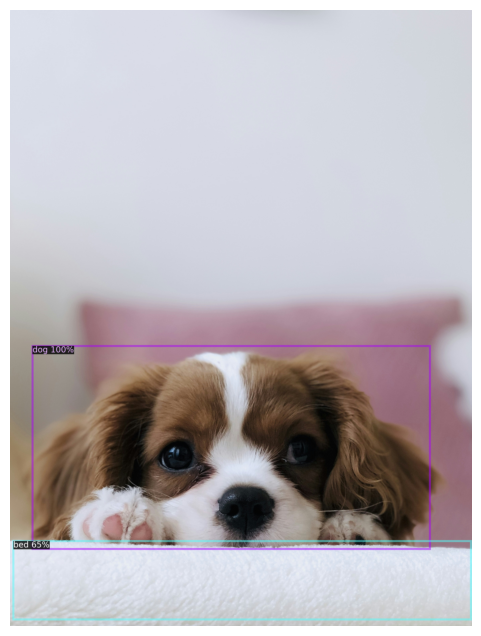

In [10]:
import urllib.request
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# Download image from URL
url = "https://images.unsplash.com/photo-1560807707-8cc77767d783"  # sample image
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set up Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

# Run inference
outputs = predictor(image)

# Print detected instances
print(outputs["instances"])

# Visualize predictions
v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0] if len(cfg.DATASETS.TRAIN) else "__unused"))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(12,8))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()


Question 10: You are assigned to build a wildlife monitoring system to detect and track
different animal species in a forest using Detectron2. Describe the end-to-end pipeline
from data collection to deploying the model, and how you would handle challenges like
occlusion or nighttime detection.
(Include your Python code and output in the code box below.)

Answer:The end-to-end pipeline for a wildlife monitoring system using Detectron2 starts with collecting images and videos from camera traps placed in the forest during both day and night. These images are then annotated with animal species labels using an annotation tool and converted into COCO format. The dataset is registered in Detectron2, and a suitable pre-trained model is fine-tuned on this custom data. After training, the model is evaluated and optimized, then deployed on an edge device or server for real-time or batch inference. Challenges like occlusion can be handled by using diverse training data and advanced models like Faster R-CNN with FPN, while nighttime detection can be improved by including infrared images, low-light data, and augmentation techniques during training.

In [11]:
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = "model_final.pth"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5

print("Wildlife detection model configured for deployment")


Wildlife detection model configured for deployment
